In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Input number of points
n = int(input("Enter number of points (n): "))

xs = []
ys = []

print("Enter points (x, y):")
for i in range(n):
    x_val, y_val = map(float, input(f"Point {i+1}: ").split())
    xs.append(x_val)
    ys.append(y_val)

xs = np.array(xs, dtype=float)
ys = np.array(ys, dtype=float)

X_query = float(input("\nEnter value of X for interpolation: "))


Enter points (x, y):


In [7]:
def lagrange_interpolate(xs, ys, x):
    n = len(xs)
    total = 0.0
    
    for i in range(n):
        Li = 1.0
        for j in range(n):
            if j != i:
                Li *= (x - xs[j]) / (xs[i] - xs[j])
        total += ys[i] * Li
    
    return total


In [8]:
def divided_differences(xs, ys):
    n = len(xs)
    table = np.zeros((n, n))
    table[:, 0] = ys
    
    for col in range(1, n):
        for row in range(n - col):
            table[row][col] = (table[row+1][col-1] - table[row][col-1]) / (xs[row+col] - xs[row])
            
    coeffs = table[0]  # first row contains Newton coefficients
    return table, coeffs

def newton_evaluate(xs, coeffs, x):
    n = len(xs)
    result = coeffs[0]
    product = 1
    
    for i in range(1, n):
        product *= (x - xs[i-1])
        result += coeffs[i] * product
    
    return result


In [10]:
y_lagrange = lagrange_interpolate(xs, ys, X_query)

table, coeffs = divided_differences(xs, ys)
y_newton = newton_evaluate(xs, coeffs, X_query)

print("\n=== RESULTS ===")
print(f"Lagrange Interpolated Value at X = {X_query} : {y_lagrange}")
print(f"Newton Interpolated Value   at X = {X_query} : {y_newton}")
print(f"Difference between methods: {abs(y_lagrange - y_newton)}")



=== RESULTS ===
Lagrange Interpolated Value at X = 20.0 : 2605.0
Newton Interpolated Value   at X = 20.0 : 2605.0
Difference between methods: 0.0


In [11]:
df = pd.DataFrame(table)
df.columns = [f"Order {i}" for i in range(n)]
print("\nDivided Differences Table:")
display(df)



Divided Differences Table:


,Order 0,Order 1,Order 2
0,2.0,1.0,8.0
1,4.0,9.0,0.0
2,-5.0,0.0,0.0


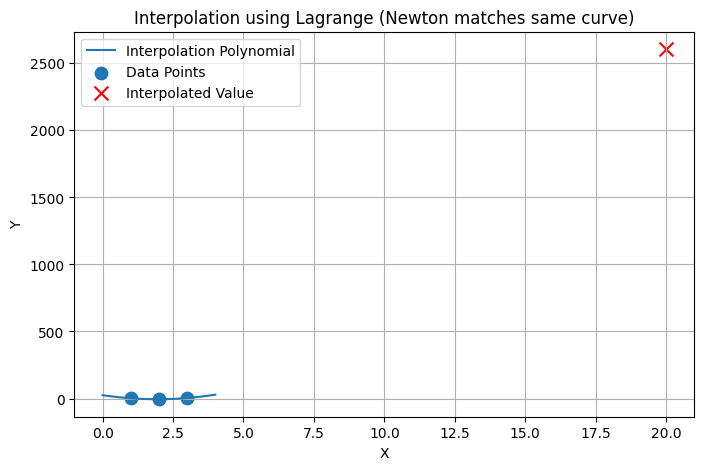

In [12]:
x_range = np.linspace(min(xs)-1, max(xs)+1, 400)
y_l = [lagrange_interpolate(xs, ys, x) for x in x_range]

plt.figure(figsize=(8,5))
plt.plot(x_range, y_l, label="Interpolation Polynomial")
plt.scatter(xs, ys, s=80, label="Data Points")
plt.scatter(X_query, y_lagrange, c='red', marker='x', s=100, label="Interpolated Value")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Interpolation using Lagrange (Newton matches same curve)")
plt.legend()
plt.grid(True)
plt.show()
